In [10]:


# import json

# data_path='/storage/human_psd/pose_data/fpllz_v1/pose_data.json'

# # filter_data_1=[]
# with open(data_path, 'r', encoding='utf-8') as f:
#         data = json.load(f)
# len(data)
# filter_id=['0618_tao_llz_18f45b660d','0618_tao_llz_3d0d9fec5f','0618_tao_llz_b73c029a09',
#            '0618_tao_llz_d1273f5a52','0618_tao_llz_ff67d4e6e9'
#            ]
# import json

# data_1_path='/storage/crello_human_V2/V3/dataset/fpllz_v1_normalize.json'

# filter_data_1=[]
# with open(data_1_path, 'r', encoding='utf-8') as f:
#         data_1 = json.load(f)

# # len(data_1)

# for d in data_1:
#     if d ['id'] not in filter_id:filter_data_1.append(d)

In [11]:
import json

data_1_path='/storage/crello_human_V2/V3/dataset/fpllz_v1_normalize.json'
data_2_path='/storage/crello_human_V2/V3/dataset/fp_v2_normalize.json'

with open(data_1_path, 'r', encoding='utf-8') as f:
        data_1 = json.load(f)
with open(data_2_path, 'r', encoding='utf-8') as f:
        data_2 = json.load(f)
print(len(data_1),len(data_2))

1692 254


In [12]:
data_merge=data_1+data_2
len(data_merge)

1946

In [13]:
output_path='/storage/crello_human_V2/V3/dataset/m12.json'
with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(data_merge, f, indent=4, ensure_ascii=False)

画出这个字典列表中length积累百分比统计图，即length<n的数据量所占百分比

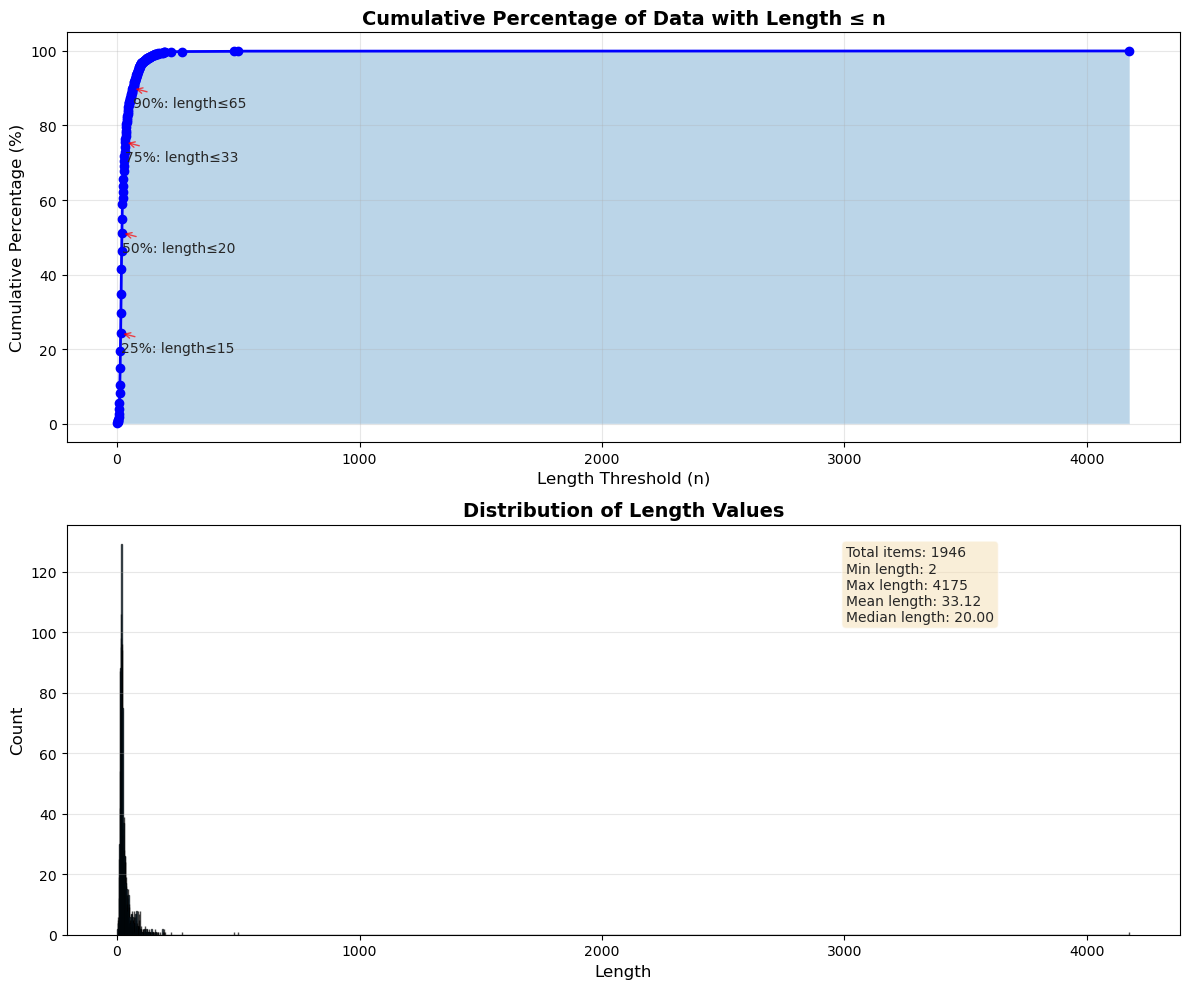


Cumulative Percentage Table:
----------------------------------------
Length ≤   Count      Percentage
----------------------------------------
2          2          0.10      %
3          8          0.41      %
4          12         0.62      %
5          17         0.87      %
6          21         1.08      %
7          33         1.70      %
8          52         2.67      %
9          77         3.96      %
10         107        5.50      %
11         161        8.27      %
12         203        10.43     %
13         290        14.90     %
14         378        19.42     %
15         473        24.31     %
16         579        29.75     %
17         677        34.79     %
18         806        41.42     %
19         902        46.35     %
20         996        51.18     %
21         1070       54.98     %
22         1145       58.84     %
23         1180       60.64     %
24         1209       62.13     %
25         1242       63.82     %
26         1279       65.72     %
27   

([2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  105,
  107,
  108,
  110,
  112,
  113,
  115,
  116,
  117,
  118,
  119,
  121,
  123,
  124,
  125,
  126,
  129,
  130,
  131,
  133,
  134,
  136,
  137,
  141,
  142,
  145,
  146,
  147,
  149,
  152,
  156,
  157,
  158,
  160,
  164,
  169,
  170,
  177,
  187,
  188,
  192,
  193,
  198,
  221,
  267,
  481,
  498,
  4175],
 [0.10277492291880781,
  0.41109969167523125,
  0.6166495375

In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # 如果需要中文，可以改为 ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def plot_length_cumulative_percentage(data, save_path='length_cumulative_percentage.png'):
    """
    绘制length的累积百分比统计图
    
    Parameters:
    - data: 包含length字段的字典列表
    - save_path: 保存图片的路径
    """
    # 提取所有的length值
    lengths = [item['length'] for item in data if 'length' in item]
    
    if not lengths:
        print("No length data found!")
        return
    
    # 排序
    lengths_sorted = sorted(lengths)
    
    # 计算累积百分比
    n_total = len(lengths)
    unique_lengths = sorted(set(lengths))
    
    cumulative_percentages = []
    cumulative_counts = []
    
    for length_threshold in unique_lengths:
        count = sum(1 for l in lengths if l <= length_threshold)
        percentage = (count / n_total) * 100
        cumulative_percentages.append(percentage)
        cumulative_counts.append(count)
    
    # 创建图表
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # 设置样式
    sns.set_style("whitegrid")
    
    # 图1: 累积百分比曲线
    ax1.plot(unique_lengths, cumulative_percentages, 'b-', linewidth=2, marker='o', markersize=6)
    ax1.fill_between(unique_lengths, cumulative_percentages, alpha=0.3)
    ax1.set_xlabel('Length Threshold (n)', fontsize=12)
    ax1.set_ylabel('Cumulative Percentage (%)', fontsize=12)
    ax1.set_title('Cumulative Percentage of Data with Length ≤ n', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # 添加一些关键点的标注
    key_percentiles = [25, 50, 75, 90]
    for percentile in key_percentiles:
        # 找到最接近这个百分比的length值
        idx = np.argmin(np.abs(np.array(cumulative_percentages) - percentile))
        if idx < len(unique_lengths):
            ax1.annotate(f'{percentile}%: length≤{unique_lengths[idx]}',
                        xy=(unique_lengths[idx], cumulative_percentages[idx]),
                        xytext=(unique_lengths[idx] + 1, cumulative_percentages[idx] - 5),
                        arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                        fontsize=10)
    
    # 图2: Length分布直方图
    ax2.hist(lengths, bins=max(unique_lengths), edgecolor='black', alpha=0.7)
    ax2.set_xlabel('Length', fontsize=12)
    ax2.set_ylabel('Count', fontsize=12)
    ax2.set_title('Distribution of Length Values', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 添加统计信息
    stats_text = f'Total items: {n_total}\n'
    stats_text += f'Min length: {min(lengths)}\n'
    stats_text += f'Max length: {max(lengths)}\n'
    stats_text += f'Mean length: {np.mean(lengths):.2f}\n'
    stats_text += f'Median length: {np.median(lengths):.2f}'
    
    # 在图上添加统计信息框
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax2.text(0.7, 0.95, stats_text, transform=ax2.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    # 打印详细的累积百分比表
    print("\nCumulative Percentage Table:")
    print("-" * 40)
    print(f"{'Length ≤':<10} {'Count':<10} {'Percentage':<10}")
    print("-" * 40)
    for i, length in enumerate(unique_lengths):
        print(f"{length:<10} {cumulative_counts[i]:<10} {cumulative_percentages[i]:<10.2f}%")
    
    return unique_lengths, cumulative_percentages

def load_and_plot(json_file_path):
    """
    从JSON文件加载数据并绘制图表
    """
    with open(json_file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    return plot_length_cumulative_percentage(data)

# 示例使用
# if __name__ == "__main__":
    # 示例数据（基于您提供的格式）
# sample_data = [
#     {
#         "id": "0618_freepik_v1_007ea65136",
#         "length": 18,
#         "canvas_width": 2480,
#         "canvas_height": 3508,
#         # ... 其他字段
#     },
#     # 添加更多数据项...
# ]

# 如果您有完整的JSON文件，使用：
# load_and_plot('your_data.json')

# 或者直接使用数据列表：
# plot_length_cumulative_percentage(sample_data)

# 生成一些模拟数据来演示
# import random
# mock_data = []
# for i in range(100):
#     mock_data.append({
#         "id": f"sample_{i}",
#         "length": random.choice(range(5, 25))  # 随机生成5-24之间的length
#     })


plot_length_cumulative_percentage(data_merge, 'length_cumulative_demo.png')

In [15]:
def filter_data_by_length(data, max_length=40):
    """
    过滤数据，删除length大于指定值的数据
    
    Parameters:
    - data: 原始数据列表
    - max_length: 最大允许的length值（默认40）
    
    Returns:
    - filtered_data: 过滤后的数据列表
    - removed_count: 被删除的数据数量
    """
    filtered_data = [item for item in data if item.get('length', 0) <= max_length]
    removed_count = len(data) - len(filtered_data)
    
    print(f"原始数据数量: {len(data)}")
    print(f"删除了 {removed_count} 条length > {max_length}的数据")
    print(f"剩余数据数量: {len(filtered_data)}")
    
    # 打印被删除数据的统计信息
    if removed_count > 0:
        removed_items = [item for item in data if item.get('length', 0) > max_length]
        removed_lengths = [item['length'] for item in removed_items]
        print(f"被删除数据的length范围: {min(removed_lengths)} - {max(removed_lengths)}")
    
    return filtered_data, removed_count

filtered_data, removed_count=filter_data_by_length(data_merge,40)
removed_count

原始数据数量: 1946
删除了 369 条length > 40的数据
剩余数据数量: 1577
被删除数据的length范围: 41 - 4175


369

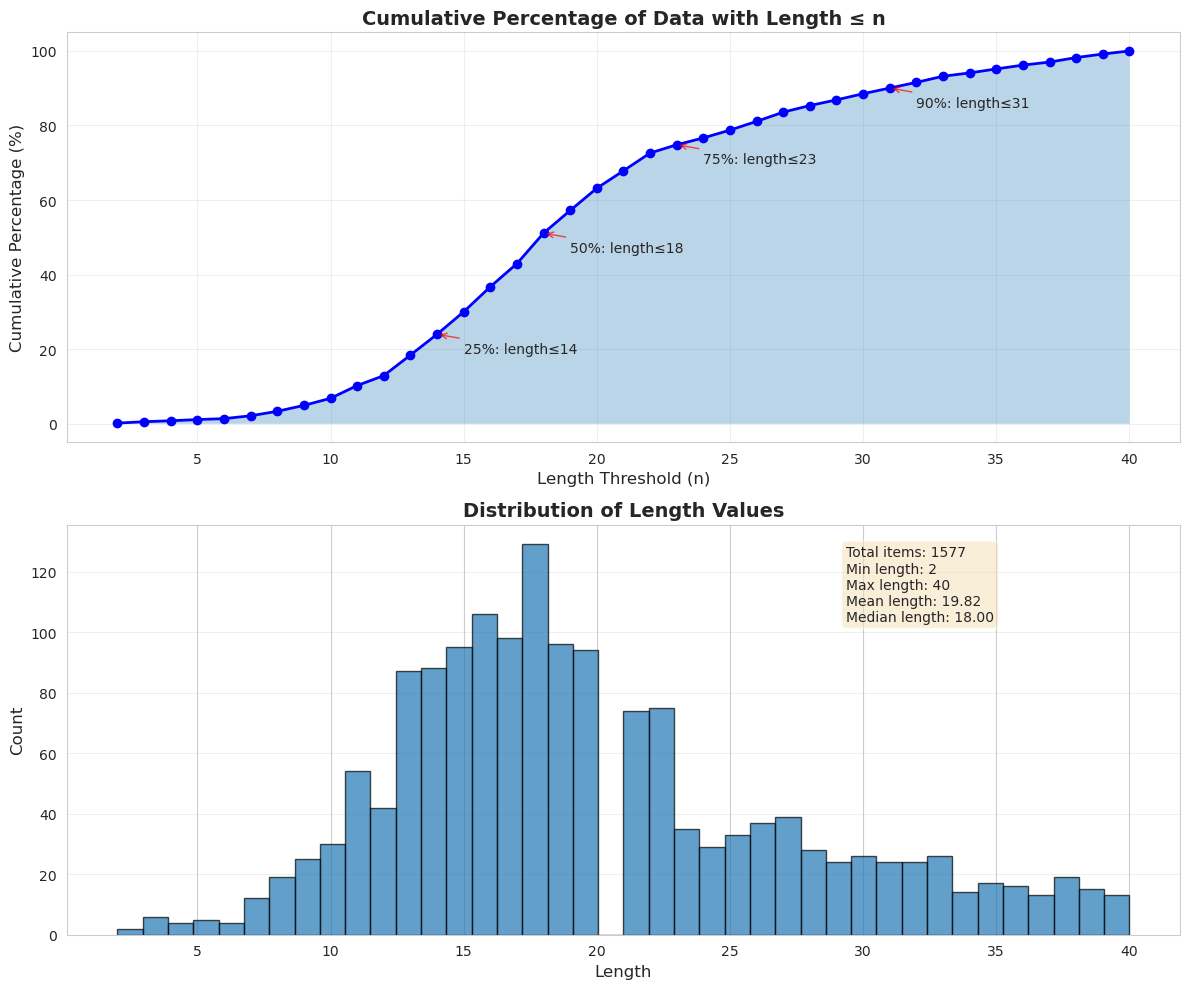


Cumulative Percentage Table:
----------------------------------------
Length ≤   Count      Percentage
----------------------------------------
2          2          0.13      %
3          8          0.51      %
4          12         0.76      %
5          17         1.08      %
6          21         1.33      %
7          33         2.09      %
8          52         3.30      %
9          77         4.88      %
10         107        6.79      %
11         161        10.21     %
12         203        12.87     %
13         290        18.39     %
14         378        23.97     %
15         473        29.99     %
16         579        36.72     %
17         677        42.93     %
18         806        51.11     %
19         902        57.20     %
20         996        63.16     %
21         1070       67.85     %
22         1145       72.61     %
23         1180       74.83     %
24         1209       76.66     %
25         1242       78.76     %
26         1279       81.10     %
27   

([2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [0.12682308180088775,
  0.507292327203551,
  0.7609384908053266,
  1.077996195307546,
  1.3316423589093214,
  2.092580849714648,
  3.2974001268230815,
  4.882688649334179,
  6.7850348763474955,
  10.209258084971465,
  12.872542802790107,
  18.389346861128725,
  23.96956246036779,
  29.993658845909955,
  36.715282181357004,
  42.92961318960051,
  51.10970196575777,
  57.197209892200384,
  63.1578947368421,
  67.85034876347495,
  72.60621433100825,
  74.82561826252378,
  76.66455294863665,
  78.7571337983513,
  81.10336081166773,
  83.57641090678504,
  85.35193405199747,
  86.87381103360812,
  88.52251109701966,
  90.0443880786303,
  91.56626506024097,
  93.2149651236525,
  94.10272669625871,
  95.18072289156626,
  96.19530754597336,
  97.01965757767914,
  98.2244

In [17]:
plot_length_cumulative_percentage(filtered_data, 'length_cumulative_demo_removed.png')

In [18]:
filtered_data[0]

{'id': '0618_freepik_v1_007ea65136',
 'length': 18,
 'canvas_width': 2480,
 'canvas_height': 3508,
 'type': [2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3],
 'left': [0.12459677419354839,
  0.22056451612903225,
  0.18870967741935485,
  0.7185483870967742,
  0.6967741935483871,
  0.5887096774193549,
  0.6512096774193549,
  0.6943548387096774,
  0.0,
  0.12459677419354839,
  0.1588709677419355,
  0.19435483870967743,
  0.22741935483870968,
  0.7423387096774193,
  0.3338709677419355,
  0.1254032258064516,
  0.0407258064516129,
  0.0],
 'top': [0.8041619156214367,
  0.6525085518814139,
  0.629133409350057,
  0.7405929304446979,
  0.7280501710376283,
  0.8235461801596351,
  0.16733181299885974,
  0.08238312428734322,
  0.0,
  0.08551881413911061,
  0.08551881413911061,
  0.08551881413911061,
  0.08551881413911061,
  0.24543899657924745,
  0.6274230330672748,
  0.12485746864310149,
  0.30359179019384264,
  0.0],
 'width': [0.21854838709677418,
  0.12096774193548387,
  0.18911290322580

{'id': '0618_freepik_v1_007ea65136',
 'length': 18,
 'canvas_width': 2480,
 'canvas_height': 3508,
 'type': [2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3],
 'left': [0.12459677419354839,
  0.22056451612903225,
  0.18870967741935485,
  0.7185483870967742,
  0.6967741935483871,
  0.5887096774193549,
  0.6512096774193549,
  0.6943548387096774,
  0.0,
  0.12459677419354839,
  0.1588709677419355,
  0.19435483870967743,
  0.22741935483870968,
  0.7423387096774193,
  0.3338709677419355,
  0.1254032258064516,
  0.0407258064516129,
  0.0],
 'top': [0.8041619156214367,
  0.6525085518814139,
...
   0.5087622404098511,
   18.203710556030273],
 'root': [[[[0.5716663599014282, -0.6353856325149536, 0.5191171765327454],
    [-0.3404753506183624, -0.759354293346405, -0.5544885396957397],
    [0.7465078830718994, 0.14023584127426147, -0.65043044090271]]]]}

删除每个数据中type为3的数据，并且删除每个数据中bbox（left,top,width,height）一样的元素，如果type为4就不要删除，注意删除之后要更新z还有human_z

In [19]:
import json
from collections import defaultdict

def clean_data_item(item):
    """
    清理单个数据项：
    1. 删除type为3的元素（type为4时保留）
    2. 删除bbox重复的元素
    3. 更新z值和humanlayout中的z值
    """
    # 获取原始数据
    types = item.get('type', [])
    lefts = item.get('left', [])
    tops = item.get('top', [])
    widths = item.get('width', [])
    heights = item.get('height', [])
    z_values = item.get('z', [])
    
    # 确保所有数组长度一致
    length = len(types)
    if not all(len(arr) == length for arr in [lefts, tops, widths, heights, z_values]):
        print(f"Warning: Arrays have different lengths for item {item.get('id', 'unknown')}")
        return item
    
    # 记录要保留的索引
    keep_indices = []
    seen_bboxes = set()
    
    for i in range(length):
        # 检查是否应该删除type=3的元素
        if types[i] == 3:
            # type为3时删除（除非明确说明type为4时保留，但这里type已经是3了）
            continue
            
        # 创建bbox元组作为唯一标识
        bbox = (lefts[i], tops[i], widths[i], heights[i])
        
        # 检查bbox是否重复
        if bbox in seen_bboxes:
            continue
            
        # 标记为已见过的bbox
        seen_bboxes.add(bbox)
        
        # 保留这个索引
        keep_indices.append(i)
    
    # 如果没有元素被删除，直接返回
    if len(keep_indices) == length:
        return item
    
    # 创建新的数据
    new_item = item.copy()
    
    # 更新数组数据
    new_item['type'] = [types[i] for i in keep_indices]
    new_item['left'] = [lefts[i] for i in keep_indices]
    new_item['top'] = [tops[i] for i in keep_indices]
    new_item['width'] = [widths[i] for i in keep_indices]
    new_item['height'] = [heights[i] for i in keep_indices]
    
    # 记录原始z值到新z值的映射
    old_z_to_new_z = {}
    new_z_values = []
    for new_z, old_idx in enumerate(keep_indices):
        old_z = z_values[old_idx]
        old_z_to_new_z[old_z] = new_z
        new_z_values.append(new_z)
    
    new_item['z'] = new_z_values
    new_item['length'] = len(new_z_values)
    
    # 更新humanlayout中的z值
    if 'humanlayout' in item and len(item['humanlayout']) >= 5:
        old_human_z = item['humanlayout'][4]
        # 如果原始的human_z在映射中，更新它
        if old_human_z in old_z_to_new_z:
            new_item['humanlayout'] = item['humanlayout'].copy()
            new_item['humanlayout'][4] = old_z_to_new_z[old_human_z]
        else:
            # 如果原始的human_z被删除了，可能需要特殊处理
            print(f"Warning: humanlayout z value {old_human_z} was removed for item {item.get('id', 'unknown')}")
            # 可以选择删除整个humanlayout或设置为最接近的有效z值
            # 这里我们尝试找到最接近的有效z值
            if old_z_to_new_z:
                closest_old_z = min(old_z_to_new_z.keys(), key=lambda x: abs(x - old_human_z))
                new_item['humanlayout'] = item['humanlayout'].copy()
                new_item['humanlayout'][4] = old_z_to_new_z[closest_old_z]
    
    return new_item

def clean_dataset(data):
    """
    清理整个数据集
    """
    cleaned_data = []
    total_removed_elements = 0
    items_with_removed_elements = 0
    
    for item in data:
        original_length = item.get('length', 0)
        cleaned_item = clean_data_item(item)
        new_length = cleaned_item.get('length', 0)
        
        if new_length < original_length:
            items_with_removed_elements += 1
            total_removed_elements += (original_length - new_length)
            print(f"Item {item.get('id', 'unknown')}: removed {original_length - new_length} elements")
        
        cleaned_data.append(cleaned_item)
    
    print(f"\n清理统计:")
    print(f"处理的数据项总数: {len(data)}")
    print(f"有元素被删除的数据项数: {items_with_removed_elements}")
    print(f"删除的元素总数: {total_removed_elements}")
    
    return cleaned_data

def analyze_data_before_after(original_data, cleaned_data):
    """
    分析清理前后的数据变化
    """
    print("\n数据清理前后对比:")
    print("-" * 50)
    
    # 统计type分布
    original_types = defaultdict(int)
    cleaned_types = defaultdict(int)
    
    for item in original_data:
        for t in item.get('type', []):
            original_types[t] += 1
    
    for item in cleaned_data:
        for t in item.get('type', []):
            cleaned_types[t] += 1
    
    print("\nType分布变化:")
    for t in sorted(set(original_types.keys()) | set(cleaned_types.keys())):
        print(f"Type {t}: {original_types[t]} -> {cleaned_types[t]} (删除了 {original_types[t] - cleaned_types[t]} 个)")
    
    # 统计length分布
    original_lengths = [item.get('length', 0) for item in original_data]
    cleaned_lengths = [item.get('length', 0) for item in cleaned_data]
    
    print(f"\nLength统计:")
    print(f"原始数据 - 最小: {min(original_lengths)}, 最大: {max(original_lengths)}, 平均: {sum(original_lengths)/len(original_lengths):.2f}")
    print(f"清理后 - 最小: {min(cleaned_lengths)}, 最大: {max(cleaned_lengths)}, 平均: {sum(cleaned_lengths)/len(cleaned_lengths):.2f}")

def clean_json_file(input_file, output_file=None):
    """
    从JSON文件读取数据，清理后保存
    """
    # 读取数据
    with open(input_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # 清理数据
    cleaned_data = clean_dataset(data)
    
    # 分析变化
    analyze_data_before_after(data, cleaned_data)
    
    # 生成输出文件名
    if output_file is None:
        base_name = input_file.rsplit('.', 1)[0]
        output_file = f"{base_name}_cleaned.json"
    
    # 保存清理后的数据
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(cleaned_data, f, indent=4, ensure_ascii=False)
    
    print(f"\n清理后的数据已保存到: {output_file}")
    return cleaned_data

# # 示例使用
# if __name__ == "__main__":
#     # 示例数据
#     sample_item = {
#         'id': '0618_freepik_v1_007ea65136',
#         'length': 18,
#         'canvas_width': 2480,
#         'canvas_height': 3508,
#         'type': [2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3],
#         'left': [0.124, 0.220, 0.188, 0.718, 0.696, 0.588, 0.651, 0.694, 0.0, 0.124, 0.158, 0.194, 0.227, 0.742, 0.333, 0.125, 0.040, 0.0],
#         'top': [0.804, 0.652, 0.629, 0.740, 0.728, 0.823, 0.167, 0.082, 0.0, 0.085, 0.085, 0.085, 0.085, 0.245, 0.627, 0.124, 0.303, 0.0],
#         'width': [0.218, 0.120, 0.189, 0.135, 0.179, 0.287, 0.161, 0.179, 1.0, 0.022, 0.022, 0.022, 0.022, 0.177, 0.076, 0.750, 0.373, 1.0],
#         'height': [0.112, 0.024, 0.079, 0.025, 0.078, 0.099, 0.055, 0.012, 1.0, 0.016, 0.016, 0.016, 0.016, 0.015, 0.054, 0.625, 0.206, 1.0],
#         'z': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
#         'humanlayout': [0.115, 0.147, 0.775, 0.676, 0]  # z=0的元素
#     }
    
#     # 测试单个数据项清理
#     print("=== 测试单个数据项清理 ===")
#     cleaned_item = clean_data_item(sample_item)
    
#     print(f"\n原始length: {sample_item['length']}")
#     print(f"清理后length: {cleaned_item['length']}")
#     print(f"原始type列表: {sample_item['type']}")
#     print(f"清理后type列表: {cleaned_item['type']}")
#     print(f"原始z列表: {sample_item['z']}")
#     print(f"清理后z列表: {cleaned_item['z']}")
#     print(f"原始humanlayout z: {sample_item['humanlayout'][4]}")
#     print(f"清理后humanlayout z: {cleaned_item['humanlayout'][4]}")
    
# 使用方法：
# 1. 清理单个数据项
# cleaned_item = clean_data_item(your_item)

# 2. 清理整个数据集
cleaned_data = clean_dataset(filtered_data)

# 3. 从文件读取、清理并保存
# clean_json_file('input.json', 'output_cleaned.json')

Item 0618_freepik_v1_007ea65136: removed 1 elements
Item 0618_freepik_v1_00f9eca249: removed 1 elements
Item 0618_freepik_v1_011cb98757: removed 2 elements
Item 0618_freepik_v1_012550b931: removed 5 elements
Item 0618_freepik_v1_0132ac111f: removed 1 elements
Item 0618_freepik_v1_015b3ca135: removed 1 elements
Item 0618_freepik_v1_018d256da6: removed 1 elements
Item 0618_freepik_v1_01c08ea914: removed 1 elements
Item 0618_freepik_v1_01c68b77be: removed 2 elements
Item 0618_freepik_v1_0302532165: removed 1 elements
Item 0618_freepik_v1_0449f2d3c8: removed 1 elements
Item 0618_freepik_v1_047644b81c: removed 3 elements
Item 0618_freepik_v1_047f1ba379: removed 3 elements
Item 0618_freepik_v1_0484e3ef99: removed 2 elements
Item 0618_freepik_v1_04ea23495e: removed 1 elements
Item 0618_freepik_v1_05188b1856: removed 1 elements
Item 0618_freepik_v1_053ad34f18: removed 1 elements
Item 0618_freepik_v1_0562925dc9: removed 1 elements
Item 0618_freepik_v1_05bc08d616: removed 1 elements
Item 0618_fr

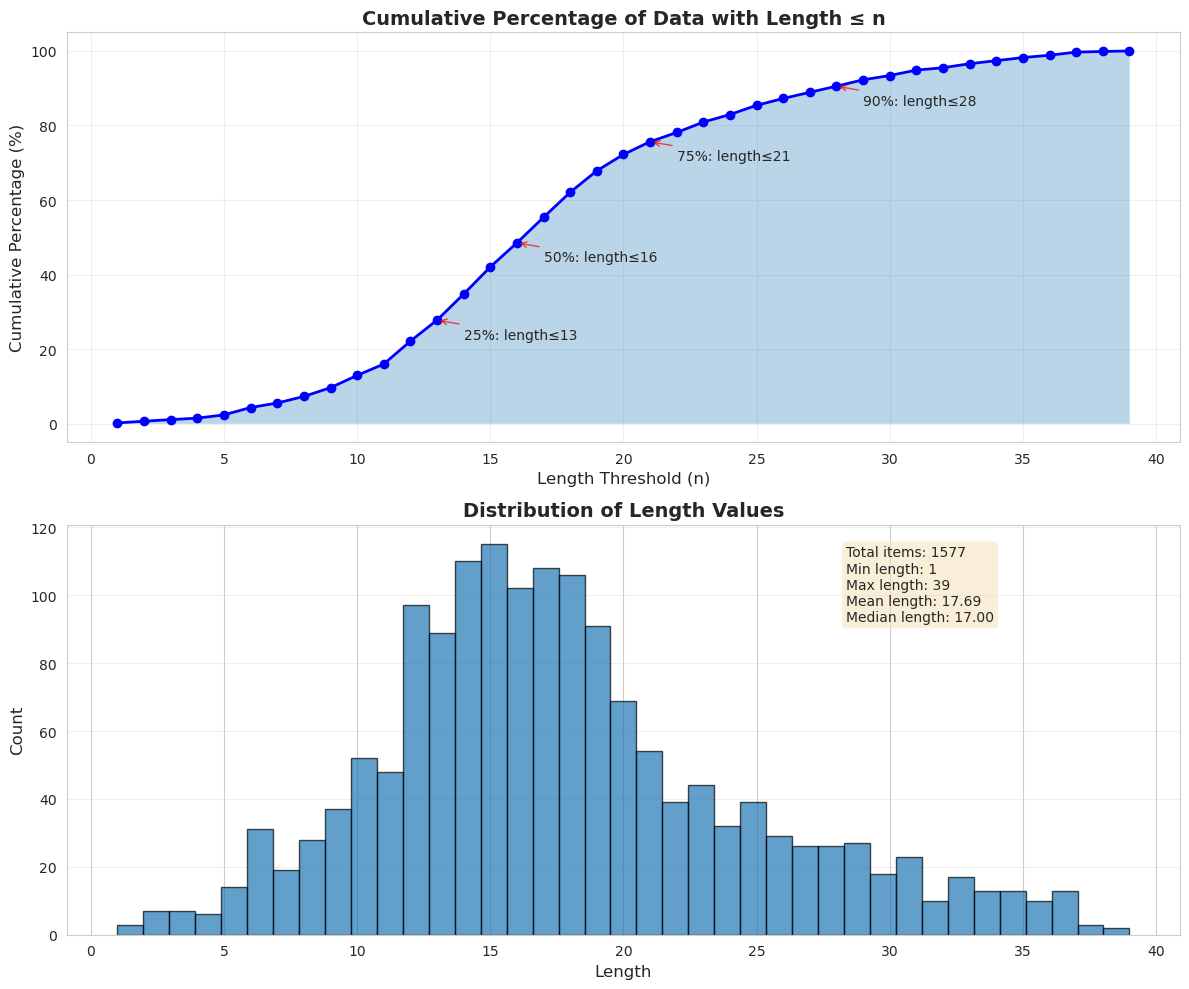


Cumulative Percentage Table:
----------------------------------------
Length ≤   Count      Percentage
----------------------------------------
1          3          0.19      %
2          10         0.63      %
3          17         1.08      %
4          23         1.46      %
5          37         2.35      %
6          68         4.31      %
7          87         5.52      %
8          115        7.29      %
9          152        9.64      %
10         204        12.94     %
11         252        15.98     %
12         349        22.13     %
13         438        27.77     %
14         548        34.75     %
15         663        42.04     %
16         765        48.51     %
17         873        55.36     %
18         979        62.08     %
19         1070       67.85     %
20         1139       72.23     %
21         1193       75.65     %
22         1232       78.12     %
23         1276       80.91     %
24         1308       82.94     %
25         1347       85.42     %
26   

([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [0.19023462270133165,
  0.6341154090044389,
  1.077996195307546,
  1.4584654407102093,
  2.346227013316424,
  4.311984781230184,
  5.516804058338617,
  7.2923272035510465,
  9.63855421686747,
  12.93595434369055,
  15.979708306911858,
  22.130627774254915,
  27.77425491439442,
  34.74952441344325,
  42.04185161699429,
  48.50982878883957,
  55.358275206087505,
  62.07989854153456,
  67.85034876347495,
  72.22574508560558,
  75.64996829422955,
  78.12301838934687,
  80.91312618896639,
  82.94229549778059,
  85.4153455928979,
  87.25428027901077,
  88.90298034242232,
  90.55168040583385,
  92.26379201014585,
  93.40519974635384,
  94.86366518706404,
  95.49778059606848,
  96.57577679137603,
  97.4001268230818,
  98.22447685478757,
  98.858592263792,
  99.6829422954

In [20]:
plot_length_cumulative_percentage(cleaned_data, 'length_cumulative_demo_removed_v2.png')

In [21]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # 如果需要中文，可以改为 ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ===== 快速使用示例：保留 5 < length < 20 的数据 =====
# 
# 1. 从JSON文件过滤并保存：
#    filter_and_save_json('input.json', length_range=(5, 20))
#
# 2. 从数据列表过滤：
#    filtered_data, removed = filter_data_by_length(data_list, length_range=(5, 20))
#
# 3. 过滤并绘图：
#    plot_length_cumulative_percentage(data, filter_length_range=(5, 20))
#
# 4. 从文件加载、过滤、绘图并保存：
#    load_and_plot('data.json', filter_length_range=(5, 20), save_filtered_data=True)

def filter_data_by_length(data, max_length=None, min_length=None, length_range=None):
    """
    过滤数据，根据length条件删除数据
    
    Parameters:
    - data: 原始数据列表
    - max_length: 最大允许的length值
    - min_length: 最小允许的length值
    - length_range: 长度范围元组 (min, max)，如 (5, 20) 表示保留 5 < length < 20
    
    Returns:
    - filtered_data: 过滤后的数据列表
    - removed_count: 被删除的数据数量
    """
    # 如果指定了length_range，使用范围过滤
    if length_range is not None:
        range_min, range_max = length_range
        filtered_data = [item for item in data if range_min < item.get('length', 0) < range_max]
        condition_desc = f"{range_min} < length < {range_max}"
    # 否则使用min/max过滤
    else:
        filtered_data = data.copy()
        conditions = []
        
        if min_length is not None:
            filtered_data = [item for item in filtered_data if item.get('length', 0) >= min_length]
            conditions.append(f"length >= {min_length}")
        
        if max_length is not None:
            filtered_data = [item for item in filtered_data if item.get('length', 0) <= max_length]
            conditions.append(f"length <= {max_length}")
        
        condition_desc = " and ".join(conditions) if conditions else "no conditions"
    
    removed_count = len(data) - len(filtered_data)
    
    print(f"原始数据数量: {len(data)}")
    print(f"过滤条件: {condition_desc}")
    print(f"删除了 {removed_count} 条不符合条件的数据")
    print(f"剩余数据数量: {len(filtered_data)}")
    
    # 打印被删除数据的统计信息
    if removed_count > 0:
        removed_items = [item for item in data if item not in filtered_data]
        removed_lengths = [item['length'] for item in removed_items]
        if removed_lengths:
            print(f"被删除数据的length范围: {min(removed_lengths)} - {max(removed_lengths)}")
            
            # 统计被删除数据的分布
            from collections import Counter
            length_counter = Counter(removed_lengths)
            print("\n被删除数据的length分布:")
            for length, count in sorted(length_counter.items()):
                print(f"  length={length}: {count}条")
    
    # 打印保留数据的统计信息
    if filtered_data:
        kept_lengths = [item['length'] for item in filtered_data]
        print(f"\n保留数据的length范围: {min(kept_lengths)} - {max(kept_lengths)}")
    
    return filtered_data, removed_count

def plot_length_cumulative_percentage(data, save_path='length_cumulative_percentage.png', 
                                    filter_max_length=None, filter_min_length=None, filter_length_range=None):
    """
    绘制length的累积百分比统计图
    
    Parameters:
    - data: 包含length字段的字典列表
    - save_path: 保存图片的路径
    - filter_max_length: 如果指定，将过滤掉大于此值的数据
    - filter_min_length: 如果指定，将过滤掉小于此值的数据
    - filter_length_range: 如果指定，将保留在此范围内的数据，如 (5, 20)
    """
    # 如果需要过滤数据
    if filter_length_range is not None or filter_max_length is not None or filter_min_length is not None:
        data, removed_count = filter_data_by_length(data, filter_max_length, filter_min_length, filter_length_range)
        print(f"\n过滤后继续绘图...\n")
    
    # 提取所有的length值
    lengths = [item['length'] for item in data if 'length' in item]
    
    if not lengths:
        print("No length data found!")
        return
    
    # 排序
    lengths_sorted = sorted(lengths)
    
    # 计算累积百分比
    n_total = len(lengths)
    unique_lengths = sorted(set(lengths))
    
    cumulative_percentages = []
    cumulative_counts = []
    
    for length_threshold in unique_lengths:
        count = sum(1 for l in lengths if l <= length_threshold)
        percentage = (count / n_total) * 100
        cumulative_percentages.append(percentage)
        cumulative_counts.append(count)
    
    # 创建图表
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # 设置样式
    sns.set_style("whitegrid")
    
    # 图1: 累积百分比曲线
    ax1.plot(unique_lengths, cumulative_percentages, 'b-', linewidth=2, marker='o', markersize=6)
    ax1.fill_between(unique_lengths, cumulative_percentages, alpha=0.3)
    ax1.set_xlabel('Length Threshold (n)', fontsize=12)
    ax1.set_ylabel('Cumulative Percentage (%)', fontsize=12)
    ax1.set_title('Cumulative Percentage of Data with Length ≤ n', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # 添加一些关键点的标注
    key_percentiles = [25, 50, 75, 90]
    for percentile in key_percentiles:
        # 找到最接近这个百分比的length值
        idx = np.argmin(np.abs(np.array(cumulative_percentages) - percentile))
        if idx < len(unique_lengths):
            ax1.annotate(f'{percentile}%: length≤{unique_lengths[idx]}',
                        xy=(unique_lengths[idx], cumulative_percentages[idx]),
                        xytext=(unique_lengths[idx] + 1, cumulative_percentages[idx] - 5),
                        arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                        fontsize=10)
    
    # 图2: Length分布直方图
    ax2.hist(lengths, bins=max(unique_lengths), edgecolor='black', alpha=0.7)
    ax2.set_xlabel('Length', fontsize=12)
    ax2.set_ylabel('Count', fontsize=12)
    ax2.set_title('Distribution of Length Values', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 添加统计信息
    stats_text = f'Total items: {n_total}\n'
    stats_text += f'Min length: {min(lengths)}\n'
    stats_text += f'Max length: {max(lengths)}\n'
    stats_text += f'Mean length: {np.mean(lengths):.2f}\n'
    stats_text += f'Median length: {np.median(lengths):.2f}'
    
    # 在图上添加统计信息框
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax2.text(0.7, 0.95, stats_text, transform=ax2.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    # 打印详细的累积百分比表
    print("\nCumulative Percentage Table:")
    print("-" * 40)
    print(f"{'Length ≤':<10} {'Count':<10} {'Percentage':<10}")
    print("-" * 40)
    for i, length in enumerate(unique_lengths):
        print(f"{length:<10} {cumulative_counts[i]:<10} {cumulative_percentages[i]:<10.2f}%")
    
    return unique_lengths, cumulative_percentages

def filter_and_save_json(input_file, output_file=None, max_length=None, min_length=None, length_range=None):
    """
    从JSON文件读取数据，根据length条件过滤数据，并保存结果
    
    Parameters:
    - input_file: 输入JSON文件路径
    - output_file: 输出JSON文件路径（如果为None，自动生成）
    - max_length: 最大允许的length值
    - min_length: 最小允许的length值
    - length_range: 长度范围元组 (min, max)
    """
    # 读取数据
    with open(input_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # 过滤数据
    filtered_data, removed_count = filter_data_by_length(data, max_length, min_length, length_range)
    
    # 生成输出文件名
    if output_file is None:
        base_name = input_file.rsplit('.', 1)[0]
        if length_range:
            output_file = f"{base_name}_filtered_length_{length_range[0]}_to_{length_range[1]}.json"
        else:
            suffix_parts = []
            if min_length is not None:
                suffix_parts.append(f"ge_{min_length}")
            if max_length is not None:
                suffix_parts.append(f"le_{max_length}")
            suffix = "_".join(suffix_parts)
            output_file = f"{base_name}_filtered_length_{suffix}.json"
    
    # 保存过滤后的数据
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(filtered_data, f, indent=4, ensure_ascii=False)
    
    print(f"\n过滤后的数据已保存到: {output_file}")
    return filtered_data

def load_and_plot(json_file_path, filter_max_length=None, filter_min_length=None, 
                  filter_length_range=None, save_filtered_data=False):
    """
    从JSON文件加载数据并绘制图表
    
    Parameters:
    - json_file_path: JSON文件路径
    - filter_max_length: 如果指定，将过滤掉大于此值的数据
    - filter_min_length: 如果指定，将过滤掉小于此值的数据
    - filter_length_range: 如果指定，将保留在此范围内的数据
    - save_filtered_data: 是否保存过滤后的数据
    """
    with open(json_file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # 如果需要过滤并保存
    if (filter_length_range is not None or filter_max_length is not None or filter_min_length is not None) and save_filtered_data:
        filtered_data, _ = filter_data_by_length(data, filter_max_length, filter_min_length, filter_length_range)
        
        # 生成新的文件名
        base_name = json_file_path.rsplit('.', 1)[0]
        if filter_length_range:
            filtered_file_path = f"{base_name}_filtered_length_{filter_length_range[0]}_to_{filter_length_range[1]}.json"
        else:
            suffix_parts = []
            if filter_min_length is not None:
                suffix_parts.append(f"ge_{filter_min_length}")
            if filter_max_length is not None:
                suffix_parts.append(f"le_{filter_max_length}")
            suffix = "_".join(suffix_parts)
            filtered_file_path = f"{base_name}_filtered_length_{suffix}.json"
        
        # 保存过滤后的数据
        with open(filtered_file_path, 'w', encoding='utf-8') as f:
            json.dump(filtered_data, f, indent=4, ensure_ascii=False)
        print(f"\n过滤后的数据已保存到: {filtered_file_path}")
    
    return plot_length_cumulative_percentage(data, filter_max_length=filter_max_length,
                                            filter_min_length=filter_min_length,
                                            filter_length_range=filter_length_range)



filtered_data_v2, removed = filter_data_by_length(cleaned_data, length_range=(5, 20))
len(filtered_data_v2)

原始数据数量: 1577
过滤条件: 5 < length < 20
删除了 544 条不符合条件的数据
剩余数据数量: 1033
被删除数据的length范围: 1 - 39

被删除数据的length分布:
  length=1: 3条
  length=2: 7条
  length=3: 7条
  length=4: 6条
  length=5: 14条
  length=20: 69条
  length=21: 54条
  length=22: 39条
  length=23: 44条
  length=24: 32条
  length=25: 39条
  length=26: 29条
  length=27: 26条
  length=28: 26条
  length=29: 27条
  length=30: 18条
  length=31: 23条
  length=32: 10条
  length=33: 17条
  length=34: 13条
  length=35: 13条
  length=36: 10条
  length=37: 13条
  length=38: 3条
  length=39: 2条

保留数据的length范围: 6 - 19


1033

In [23]:
output_path_v2='/storage/crello_human_V2/V3/dataset/m12_fillter_v1.json'
with open(output_path_v2, 'w', encoding='utf-8') as f:
    json.dump(filtered_data_v2, f, indent=4, ensure_ascii=False)